# Homework 2
## By : Hana McVicker
## Github link : https://github.com/hanamcvicker/EE399

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from numpy import linalg as LA
from numpy.linalg import eig
from numpy.linalg import svd
import pandas as pd

# Loading the data
results=loadmat('yalefaces.mat')
# Matrix X, individual images are columns
X=results['X']

a)  Compute a 100 × 100 correlation matrix C where you will compute the dot product (correlation)
between the first 100 images in the matrix X. Thus each element is given by cjk = xT
j xk where xj is the jth column of the matrix. Plot the correlation matrix using pcolor.



(100, 100)


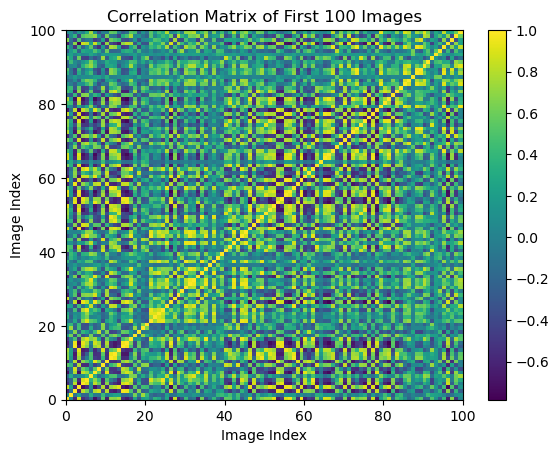

In [109]:
# Select the first 100 images from X
X_100 = X[:, :100]

# Compute the correlation matrix C
C = np.corrcoef(X_100, rowvar = False)

# Print the shape of C_100
print(C.shape)

# Plot the correlation matrix
plt.pcolor(C)
plt.title('Correlation Matrix of First 100 Images')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.colorbar()



(b)  From the correlation matrix for part (a), which two images are most highly correlated? Which are
most uncorrelated? Plot these faces.

(5, 62)
(36, 5)


Text(0, 0.5, 'Image Index')

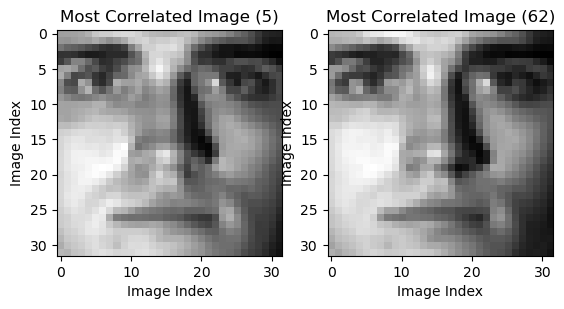

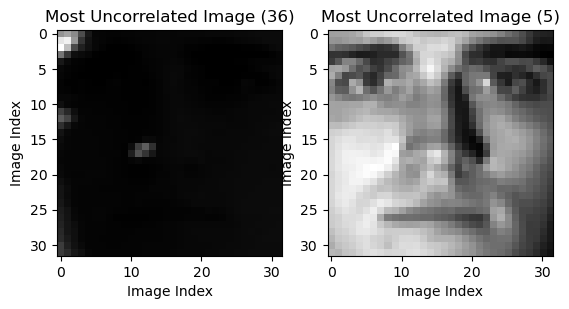

In [110]:
# Replace 1 with 0 to get the right highest correlation
np.fill_diagonal(C, -10)

# Find the indices of the most uncorrelated images
max_correlated = np.unravel_index(np.argmax(C), C.shape)
min_correlated = np.unravel_index(np.argmin(np.abs(C)), C.shape)

print(max_correlated)
print(min_correlated)

# Plot the most highly correlated images
plt.figure()
plt.subplot(1,2,1)
plt.imshow(X_100[:, max_correlated[0]].reshape(32,32), cmap='gray')
plt.title('Most Correlated Image (5)')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.subplot(1,2,2)
plt.imshow(X_100[:, max_correlated[1]].reshape(32, 32), cmap='gray')
plt.title('Most Correlated Image (62)')
plt.xlabel('Image Index')
plt.ylabel('Image Index')

# Plot the most uncorrelated images
plt.figure()
plt.subplot(1,2,1)
plt.imshow(X_100[:, min_correlated[0]].reshape(32, 32), cmap='gray')
plt.title('Most Uncorrelated Image (36)')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.subplot(1,2,2)
plt.imshow(X_100[:, min_correlated[1]].reshape(32,32), cmap='gray')
plt.title('Most Uncorrelated Image (5)')
plt.xlabel('Image Index')
plt.ylabel('Image Index')




(c)  Repeat part (a) but now compute the 10 × 10 correlation matrix between images and plot the
correlation matrix between them.
[1, 313, 512, 5, 2400, 113, 1024, 87, 314, 2005].
(Just for clarification, the first image is labeled as one, not zero like python might do)

(10, 10)


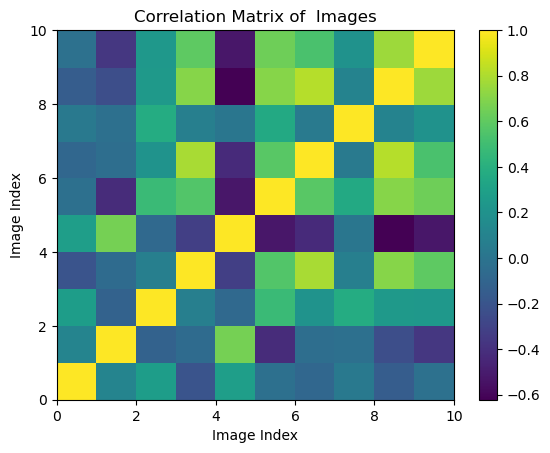

In [111]:
# Define the indices to extract
indices = [1, 313, 512, 5, 2400, 113, 1024, 87, 314, 2005]

# Use indexing to extract the elements at the specified indices
X_10 = X[:, indices]

# Compute the correlation matrix C
C2 = np.corrcoef(X_10, rowvar = False)

# Print the shape of C_10
print(C2.shape)

# Plot the correlation matrix
plt.pcolor(C2)
plt.title('Correlation Matrix of  Images')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.colorbar()

(d) Create the matrix Y = XXT and find the first six eigenvectors with the largest magnitude eigenvalue.

In [112]:
# perform matrix multiplication of X w/ its transpose
Y = np.matmul(X,X.T)

# calculate eigenvalues and eigenvectors of Y
eigenValues, eigenVectors = eig(Y)

# select top six eigenvalues and corresponding eigenvectors
topsix_Values = eigenValues[:6]
topsix_Vectors = eigenVectors[:, :6]

# Print the first 6 largest magnitudes and corresponding Vectors
print('Six largest Magnitude EigenValue: ' + str(topsix_Values))
print('')
print('First Six Eigenvectors with the Largest Magnitude EigenValue:'+ str(topsix_Vectors))

Six largest Magnitude EigenValue: [234020.45485389  49038.31530059   8236.53989701   6024.87145793
   2051.49643269   1901.07911482]

First Six Eigenvectors with the Largest Magnitude EigenValue:[[ 0.02384327  0.04535378  0.05653196  0.04441826 -0.03378603  0.02207542]
 [ 0.02576146  0.04567536  0.04709124  0.05057969 -0.01791442  0.03378819]
 [ 0.02728448  0.04474528  0.0362807   0.05522219 -0.00462854  0.04487476]
 ...
 [ 0.02082937 -0.03737158  0.06455006 -0.01006919  0.06172201  0.03025485]
 [ 0.0193902  -0.03557383  0.06196898 -0.00355905  0.05796353  0.02850199]
 [ 0.0166019  -0.02965746  0.05241684  0.00040934  0.05757412  0.00941028]]


(e) SVD the matrix X and find the first six principal component directions.

In [113]:
# Compute SVD of Matrix X
u, s, v = svd(X)

# Select the first six columns of the matrix u 
u_vectors = u[:, :6]
print('First Six Principal Component Directions')
print(u_vectors)

First Six Principal Component Directions
[[-0.02384327  0.04535378  0.05653196 -0.04441826  0.03378603 -0.02207542]
 [-0.02576146  0.04567536  0.04709124 -0.05057969  0.01791442 -0.03378819]
 [-0.02728448  0.04474528  0.0362807  -0.05522219  0.00462854 -0.04487476]
 ...
 [-0.02082937 -0.03737158  0.06455006  0.01006919 -0.06172201 -0.03025485]
 [-0.0193902  -0.03557383  0.06196898  0.00355905 -0.05796353 -0.02850199]
 [-0.0166019  -0.02965746  0.05241684 -0.00040934 -0.05757412 -0.00941028]]


(f) Compare the first eigenvector v1 from (d) with the first SVD mode u1 from (e) and compute the
norm of difference of their absolute values.

In [114]:
# Compute the norm of the difference of the absolute values of the first eigenvector and SVD mode
norm = LA.norm(np.abs(topsix_Vectors[:, 0]) - np.abs(u_vectors[:, 0]))
print('Norm of the Difference of the Absolute Values of the First Eigenvector and SVD Mode u1')
print(norm)


Norm of the Difference of the Absolute Values of the First Eigenvector and SVD Mode u1
1.3582220155626267e-15


(g) Compute the percentage of variance captured by each of the first 6 SVD modes. Plot the first 6
SVD modes

Percentage of Variance Captured by each of the first SVD modes:
[0.72927567 0.15281763 0.02566745 0.01877525 0.00639306 0.00592431]


Text(0, 0.5, 'Image Index')

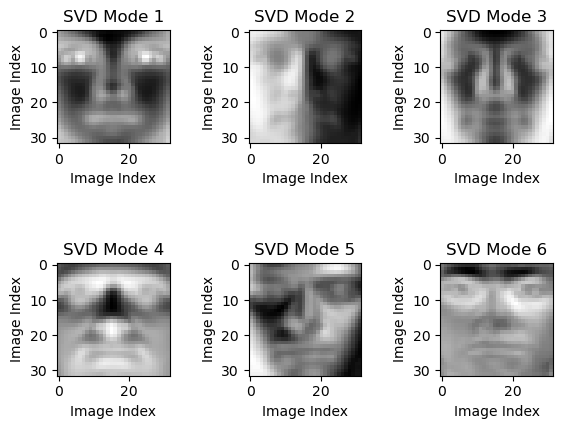

In [115]:
# Compute the percentage of variance captured by each of the first 6 SVD modes
variance = np.square(s[:6]) / np.sum(np.square(s))

print('Percentage of Variance Captured by each of the first SVD modes:')
print(variance)

plt.figure()
plt.subplot(2,3,1)
plt.imshow(u_vectors[:, 0].reshape(32,32), cmap='gray')
plt.title('SVD Mode 1')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.subplot(2,3,2)
plt.imshow(u_vectors[:, 1].reshape(32,32), cmap='gray')
plt.title('SVD Mode 2')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.subplot(2,3,3)
plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.7)
plt.imshow(u_vectors[:, 2].reshape(32,32), cmap='gray')
plt.title('SVD Mode 3')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.subplot(2,3,4)
plt.imshow(u_vectors[:, 3].reshape(32,32), cmap='gray')
plt.title('SVD Mode 4')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.subplot(2,3,5)
plt.imshow(u_vectors[:, 4].reshape(32,32), cmap='gray')
plt.title('SVD Mode 5')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.subplot(2,3,6)
plt.imshow(u_vectors[:, 5].reshape(32,32), cmap='gray')
plt.title('SVD Mode 6')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
